# KAGGLE : DIGIT RECOGNIZER
######  Learn computer vision fundamentals including simple neural networks with the famous MNIST data
#### Deep Learning with Python, Keras and TensorFlow

##### Project Description :

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

##### Data Description :

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top.

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

##### Submission Format :

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:


ImageId,Label

1,3

2,7

3,8 

(27997 more lines)

##### Evalution Format :

The evaluation metric is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

##### Data Provided :

    1. sample_submission.csv
    2. test.csv
    3. train.csv

##### Steps to follow for this project :

    1. Loading and Understanding data
    2. Data preprocessing
    3. CNN Model buiding
    4. Evaluate the model
    5. Prediction
    6. Submission

### 1. Loading and Understanding data

In [1]:
# !pip install keras

In [2]:
# !pip install tensorflow

In [3]:
# numpy and pandas
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

# keras and tensorflow
import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

np.random.seed(2)

In [4]:
# Load the data
train = pd.read_csv(r"digit-recognizer\train.csv")
test = pd.read_csv(r"digit-recognizer\test.csv")

In [5]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# defining X and y
X_train = train.drop(labels = ["label"], axis = 1) 
y_train = train["label"]

In [8]:
X_train.shape

(42000, 784)

In [9]:
y_train.shape

(42000,)

### 2. Data Preprocessing 

In [10]:
# y_train data
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

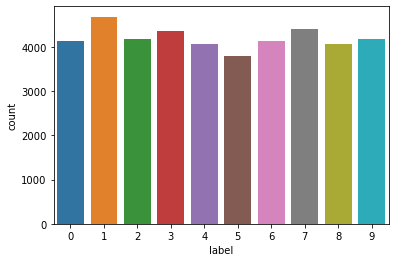

In [11]:
# plot for y_train
p = sns.countplot(y_train)

In [12]:
# check null values for train data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [13]:
# check null values for test data
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [14]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [15]:
# image reshaping
IMG_SIZE = 28 #given
X_train = X_train.values.reshape(-1,IMG_SIZE,IMG_SIZE,1)
test = test.values.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [16]:
# Encode labels
y_train = to_categorical(y_train, num_classes = 10)

In [17]:
# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)

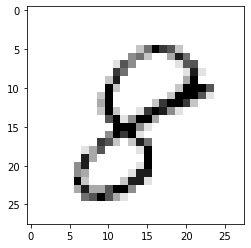

In [18]:
# sample image check
plt.imshow(X_train[0][:,:,0], cmap = plt.cm.binary) # cmap is used to bring the image in the grayscale/BnW format
plt.show()

In [19]:
print(X_train[0][:,:,0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [20]:
# using keras under tensorflow to represent the X data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_val = tf.keras.utils.normalize(X_val, axis=1)

In [21]:
print(X_train[0][:,:,0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### 3. CNN model building

In [22]:
# initialise the sequential model
model = Sequential()

# defining the batch size
BATCH = 86

In [23]:
# input layer
model.add(Flatten()) # Flatten layer is used for flattening the image input

# two hidden layers
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5)) # dropout is used to prevent the overfitting

# output layer
model.add(Dense(10, activation = 'softmax')) # softmax is used for prob distribution for 10 digits

In [24]:
# optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [25]:
# training the model with 10 epochs
model.fit(X_train, y_train, batch_size = BATCH, epochs=10)

Epoch 1/10
440/440 [==============================] - 3s 6ms/step - loss: 0.4169 - accuracy: 0.8778
Epoch 2/10
440/440 [==============================] - 3s 6ms/step - loss: 0.1603 - accuracy: 0.9513
Epoch 3/10
440/440 [==============================] - 2s 5ms/step - loss: 0.1092 - accuracy: 0.9661
Epoch 4/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0802 - accuracy: 0.9751
Epoch 5/10
440/440 [==============================] - 2s 6ms/step - loss: 0.0594 - accuracy: 0.9816
Epoch 6/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0441 - accuracy: 0.9861
Epoch 7/10
440/440 [==============================] - 2s 6ms/step - loss: 0.0369 - accuracy: 0.9885
Epoch 8/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0286 - accuracy: 0.9907
Epoch 9/10
440/440 [==============================] - 2s 5ms/step - loss: 0.0260 - accuracy: 0.9915
Epoch 10/10
440/440 [==============================] - 2s 6ms/step - loss: 0.0188 - accuracy: 0.9937

### 4. Evaluate the model

In [26]:
# evaluate the validation data
val_loss, val_acc = model.evaluate(X_val, y_val)

132/132 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9740


In [27]:
# printing validation loss
print(val_loss)

0.10149693489074707


In [28]:
# printing validation accuracy
print(val_acc)

0.9740476012229919


### 5. Prediction

In [29]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1)

In [30]:
# checking sample y pred value
print(Y_pred_classes[0])

6


In [31]:
# checking sample y true value for the predicted value
print(Y_true[0])

6


As we can see that it has predicted correctly as the true value.

In [32]:
# predict results
results = model.predict(test)

# select the index with the maximum probability
results = np.argmax(results, axis = 1)

results = pd.Series(results, name="Label")

In [33]:
results.head(10)

0    2
1    0
2    9
3    9
4    3
5    7
6    0
7    3
8    0
9    3
Name: Label, dtype: int64

### 6. Submission

Finally, building the submission file for the result data.

In [34]:
submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"), results],axis = 1)

submission.to_csv("cnn2_digit_recognizer.csv", index=False)